In [ ]:
#!pip install kmodes # for KModes clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the data

In [2]:
df = pd.read_parquet('../Data/features.parquet.gz')
df = df.drop([
              'Gift Cards'
              ,'car & motorbike'
              ,'onesie'
              ,'pet supplies'
              ,'Tees'
              ,'Hoodies and Jackets'
              ,'office'
              ,'home & kitchen'
             ], axis=1)
df.head()

Predicted_Category,Caps and Hats,Drinkware,Kids Apparel,bags & luggage,beauty & health,sports & fitness
CustomerID,,,,,,
12346,0,0,0,0,0,0
12347,2,3,1,3,0,2
12348,0,3,2,0,0,2
12350,4,0,0,0,0,1
12356,0,3,2,1,2,2


In [3]:
df.shape

(1468, 6)

# Additional Feature engineering 

We turn the counts into just a True or False statement whether the customer bought a product from a category or not.

In [4]:
for col in df.columns:
    df[col] = np.where(df[col] > 0, 1, 0)

df.head()

Predicted_Category,Caps and Hats,Drinkware,Kids Apparel,bags & luggage,beauty & health,sports & fitness
CustomerID,,,,,,
12346,0,0,0,0,0,0
12347,1,1,1,1,0,1
12348,0,1,1,0,0,1
12350,1,0,0,0,0,1
12356,0,1,1,1,1,1


In [5]:
df.sum() / len(df)

Predicted_Category
Caps and Hats       0.453678
Drinkware           0.639646
Kids Apparel        0.378747
bags & luggage      0.473433
beauty & health     0.419619
sports & fitness    0.510899
dtype: float64

# Data for clustering (no removal of product categories)

In [6]:
X = df.to_numpy()

# Clustering

### 1. K-Means clustering

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Store the evaluation scores
inertia = []
silhouette_scores = []
ch_score = []
davies_bouldin_scores = []

# Try several K number of clusters
k_values = range(4, 15)
for k in k_values:
    print(f"k = {k}")

    # Storing the raw scores for each model
    inertia_samples = []
    silhouette_score_samples = []
    ch_score_samples = []
    db_score_samples = []

    # Cluster 10 times to get the average scores
    for _ in range(10):
        print(f"\tj = {_}")
        
        # Clustering Step
        kmeans = KMeans(n_clusters=k, 
                        init='k-means++', 
                        algorithm='elkan',
                        n_init=10)
        kmeans.fit(X)

        # Getting the cluster labels
        labels = kmeans.labels_

        # Get the Inertia (for elbow method)
        inertia_samples.append(kmeans.inertia_)
    
        # Get the Silhouette score
        silhouette_score_samples.append(silhouette_score(X, labels))

        # Calinski-Harabasz score 
        ch_score_samples.append(calinski_harabasz_score(X, labels))
        
        # Davies Bouldin Score
        db_score_samples.append(davies_bouldin_score(X, labels))


    # Mean of the metrics
    inertia.append(inertia_samples)
    silhouette_scores.append(silhouette_score_samples)
    ch_score.append(ch_score_samples)
    davies_bouldin_scores.append(db_score_samples)

k = 4
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 5
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 6
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 7
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 8
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 9
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 10
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 11
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 12
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 13
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 14
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9


### Evaluation

Text(0.5, 1.0, 'Davies Bouldin Score (ideal: close to zero)')

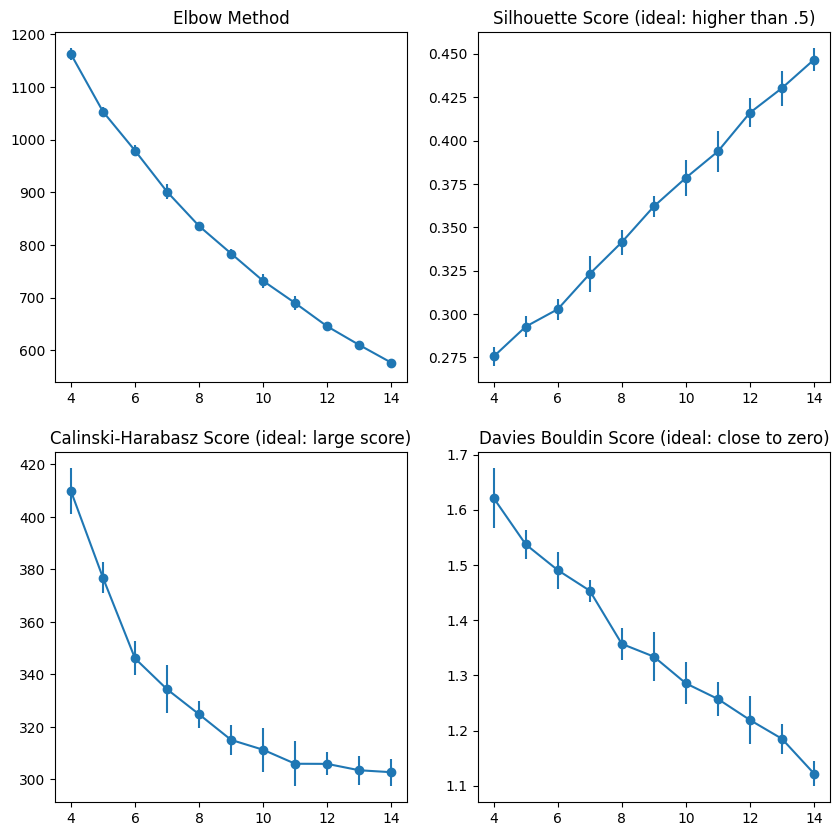

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(k_values, np.mean(inertia, axis=1), linestyle='-', marker='o')
axs[0, 0].errorbar(k_values, np.mean(inertia, axis=1), yerr = np.std(inertia, axis=1, ddof=1), fmt ='none')
axs[0, 0].set_title('Elbow Method')

axs[0, 1].plot(k_values, np.mean(silhouette_scores, axis=1), linestyle='-', marker='o')
axs[0, 1].errorbar(k_values, np.mean(silhouette_scores, axis=1), yerr = np.std(silhouette_scores, axis=1, ddof=1), fmt ='none')
axs[0, 1].set_title('Silhouette Score (ideal: higher than .5)')

axs[1, 0].plot(k_values, np.mean(ch_score, axis=1), linestyle='-', marker='o')
axs[1, 0].errorbar(k_values, np.mean(ch_score, axis=1), yerr = np.std(ch_score, axis=1, ddof=1), fmt ='none')
axs[1, 0].set_title('Calinski-Harabasz Score (ideal: large score)')

axs[1, 1].plot(k_values, np.mean(davies_bouldin_scores, axis=1), linestyle='-', marker='o')
axs[1, 1].errorbar(k_values, np.mean(davies_bouldin_scores, axis=1), yerr = np.std(davies_bouldin_scores, axis=1, ddof=1), fmt ='none')
axs[1, 1].set_title('Davies Bouldin Score (ideal: close to zero)')

### 2. K-Modes clustering (ideal for categorical variables)

In [10]:
from kmodes.kmodes import KModes

# Store the evaluation scores
inertia_scores = []
silhouette_scores = []
ch_score = []
davies_bouldin_scores = []

# Try several K number of clusters
k_values = range(4, 12)
for k in k_values:
    print(f"k = {k}")

    # Storing the raw scores for each model
    inertia_samples = []
    silhouette_score_samples = []
    ch_score_samples = []
    db_score_samples = []

    # Cluster 10 times to get the average scores
    for _ in range(10):
        print(f"\tj = {_}")
        
        # Clustering Step
        kmodes = KModes(n_clusters=k
                        ,init='Huang'
                        ,n_init=10
                        ,n_jobs=-1)
        kmodes.fit(X)

        # Getting the cluster labels
        labels = kmodes.labels_

        # Elbow method
        inertia_samples.append(kmodes.cost_)
    
        # Get the Silhouette score
        silhouette_score_samples.append(silhouette_score(X, labels))

        # Calinski-Harabasz score 
        ch_score_samples.append(calinski_harabasz_score(X, labels))
        
        # Davies Bouldin Score
        db_score_samples.append(davies_bouldin_score(X, labels))


    # Mean of the metrics
    inertia_scores.append(inertia_samples)
    silhouette_scores.append(silhouette_score_samples)
    ch_score.append(ch_score_samples)
    davies_bouldin_scores.append(db_score_samples)

k = 4
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 5
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 6
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 7
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 8
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 9
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 10
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9
k = 11
	j = 0
	j = 1
	j = 2
	j = 3
	j = 4
	j = 5
	j = 6
	j = 7
	j = 8
	j = 9


Text(0.5, 1.0, 'Davies Bouldin Score (ideal: close to zero)')

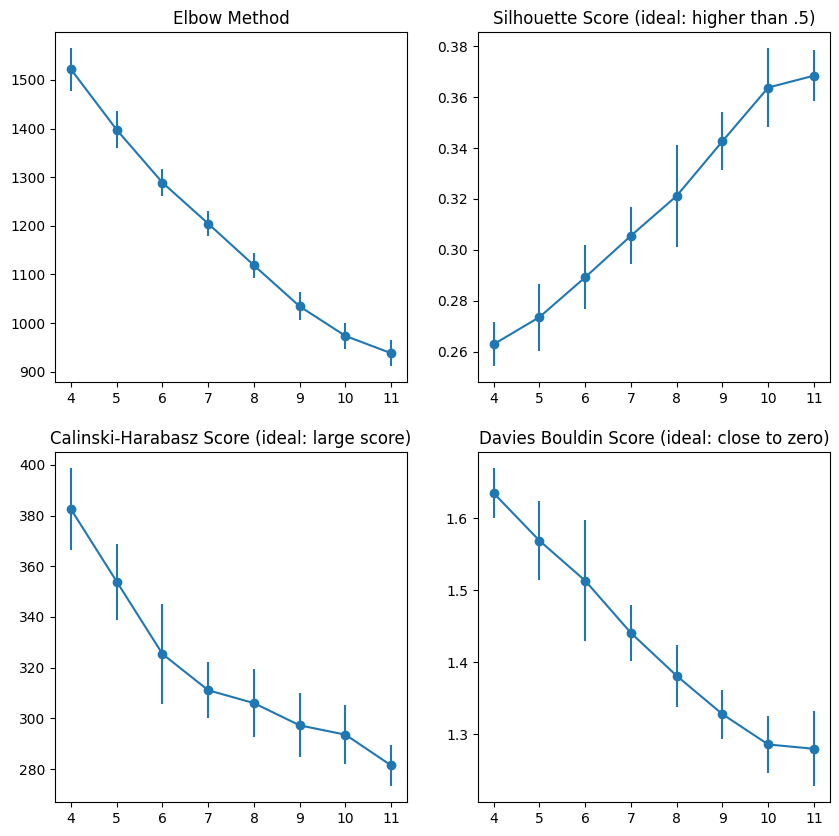

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(k_values, np.mean(inertia_scores, axis=1), linestyle='-', marker='o')
axs[0, 0].errorbar(k_values, np.mean(inertia_scores, axis=1), yerr = np.std(inertia_scores, axis=1, ddof=1), fmt ='none')
axs[0, 0].set_title('Elbow Method')

axs[0, 1].plot(k_values, np.mean(silhouette_scores, axis=1), linestyle='-', marker='o')
axs[0, 1].errorbar(k_values, np.mean(silhouette_scores, axis=1), yerr = np.std(silhouette_scores, axis=1, ddof=1), fmt ='none')
axs[0, 1].set_title('Silhouette Score (ideal: higher than .5)')

axs[1, 0].plot(k_values, np.mean(ch_score, axis=1), linestyle='-', marker='o')
axs[1, 0].errorbar(k_values, np.mean(ch_score, axis=1), yerr = np.std(ch_score, axis=1, ddof=1), fmt ='none')
axs[1, 0].set_title('Calinski-Harabasz Score (ideal: large score)')

axs[1, 1].plot(k_values, np.mean(davies_bouldin_scores, axis=1), linestyle='-', marker='o')
axs[1, 1].errorbar(k_values, np.mean(davies_bouldin_scores, axis=1), yerr = np.std(davies_bouldin_scores, axis=1, ddof=1), fmt ='none')
axs[1, 1].set_title('Davies Bouldin Score (ideal: close to zero)')

## Clusters are bad (no elbow in the elbow method). Other metrics also indicate bad separation. We need further feature engineering.